In [1]:
%matplotlib inline

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

# Tree and Ensemble Methods

In [3]:
data = load_digits()

In [4]:
attributes, targets = data["data"], data["target"]

In [9]:
attributes.shape

(1797, 64)

In [5]:
data.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [45]:
tree = DecisionTreeClassifier(min_samples_leaf = 0.05)

In [46]:
tree.fit(attributes, targets)

DecisionTreeClassifier(min_samples_leaf=0.05)

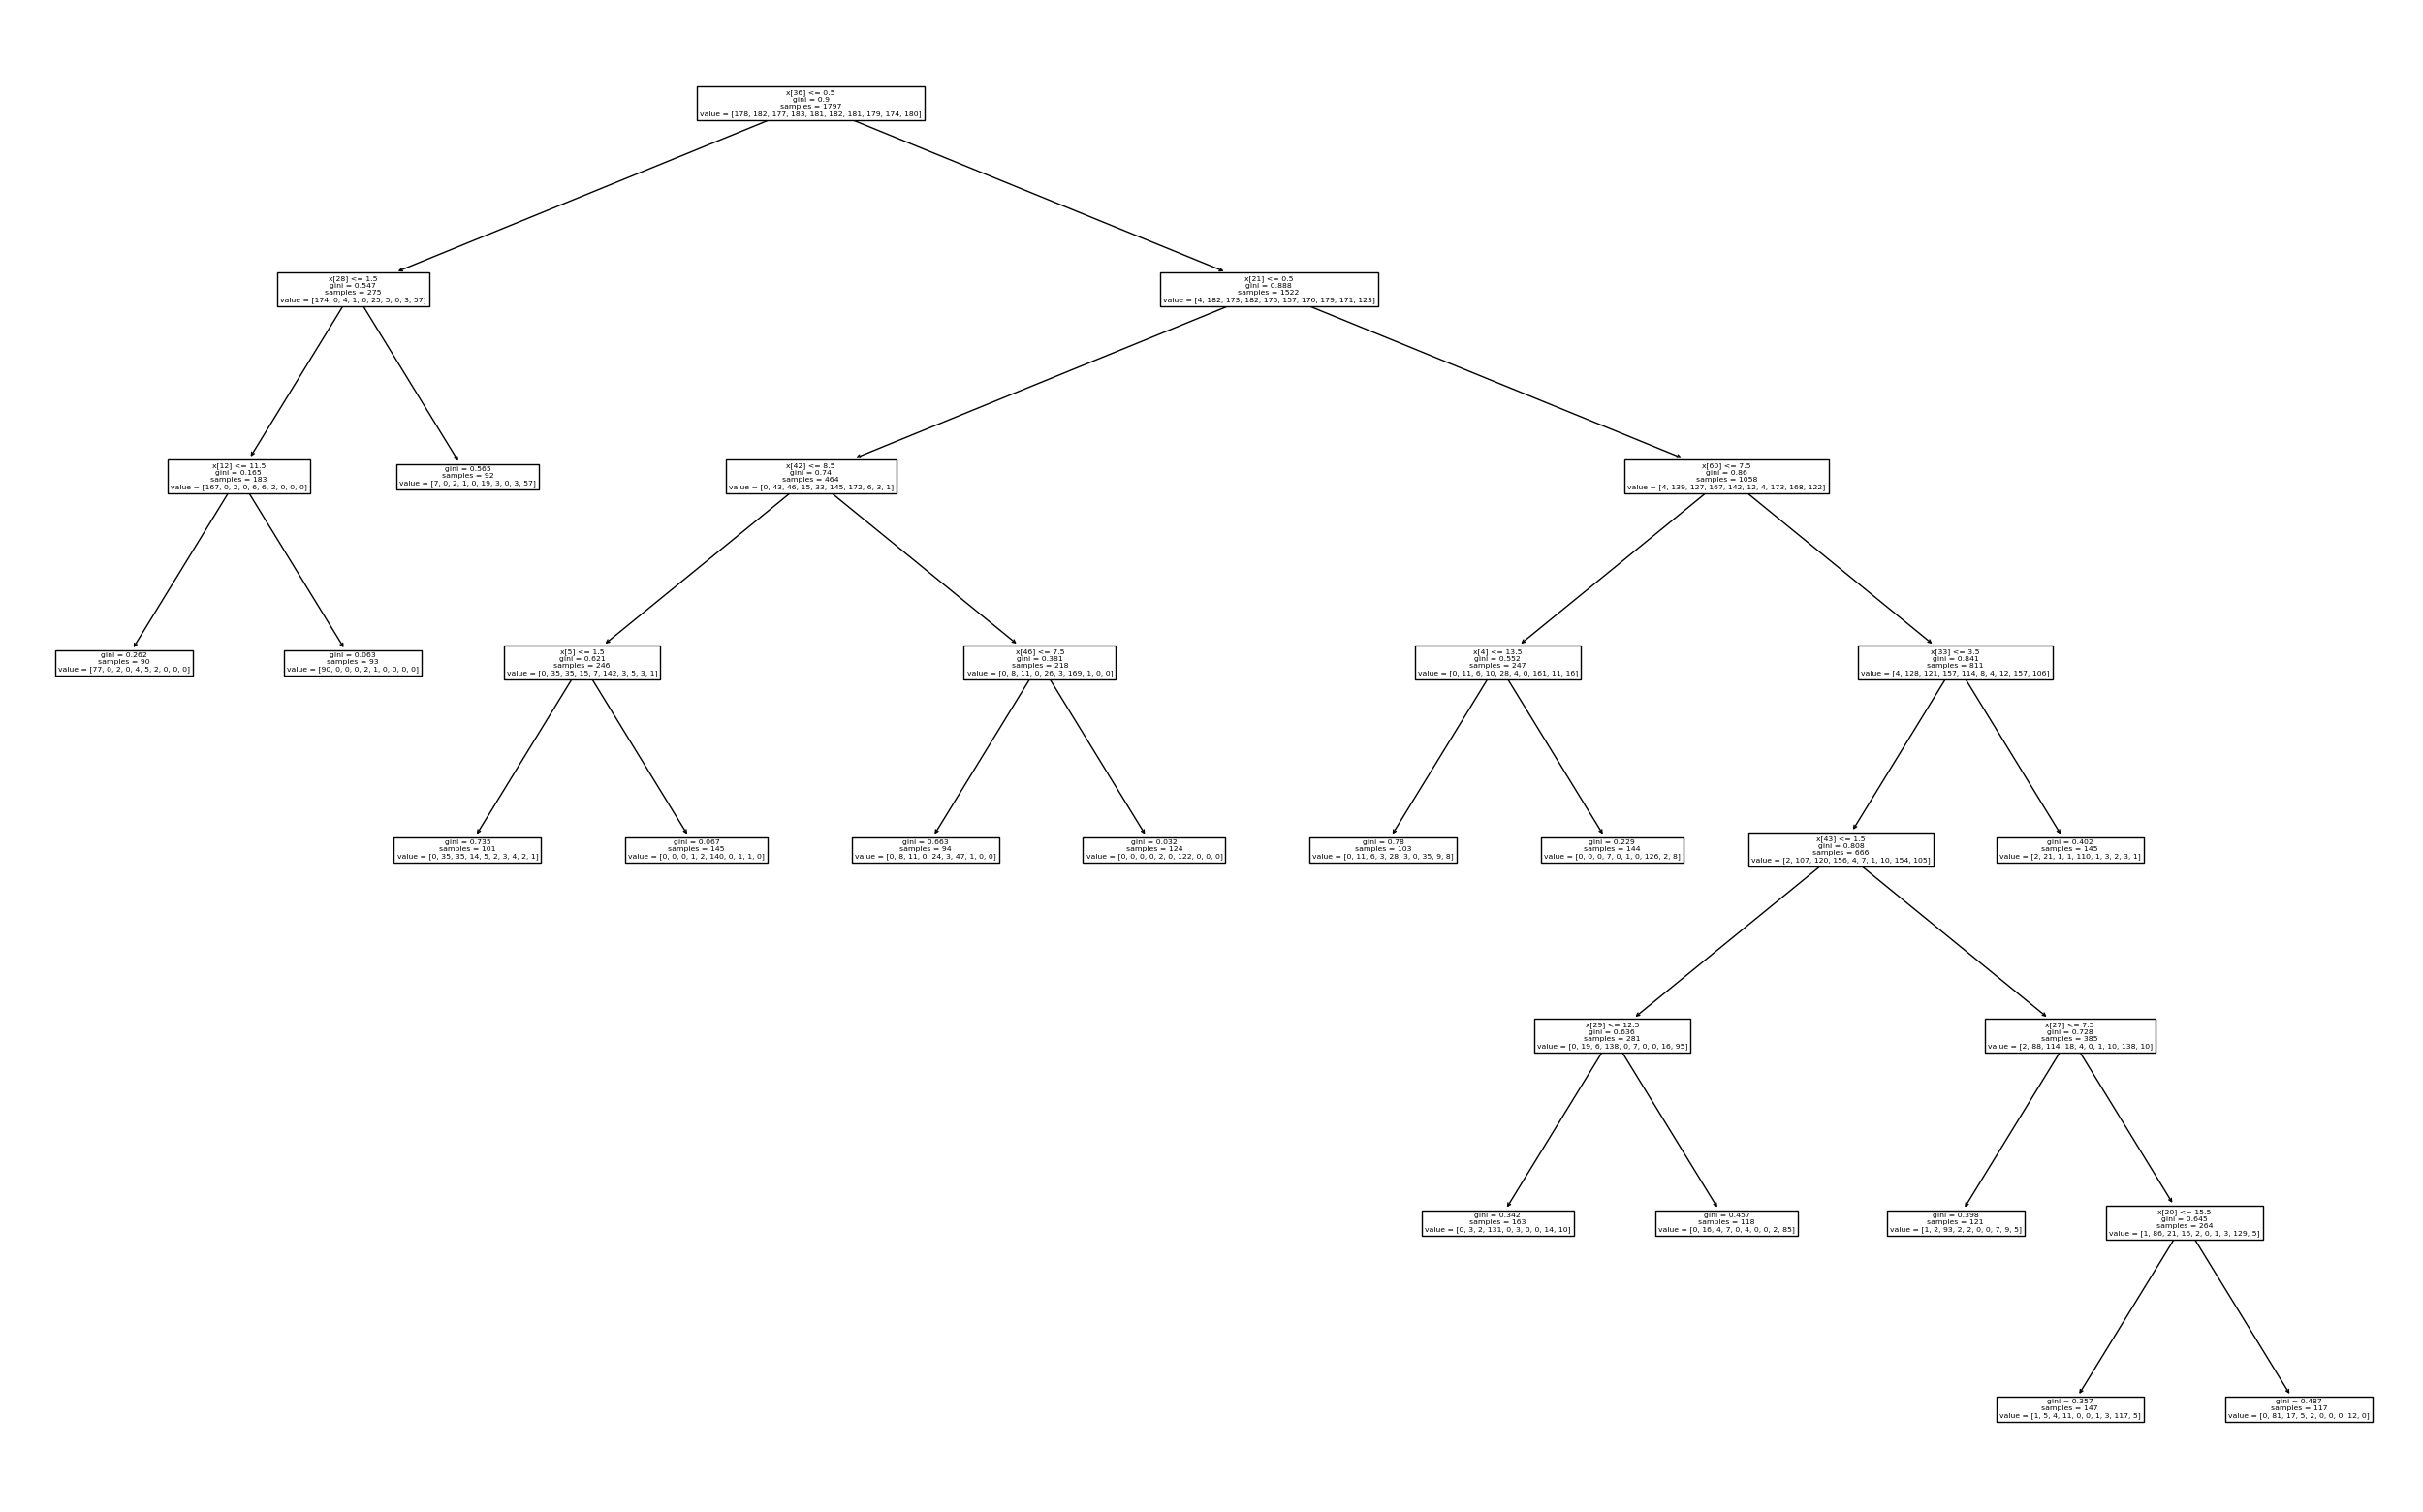

In [47]:
plt.figure(figsize = (32, 20))
plot_tree(tree)
plt.show()

In [35]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- class: 5
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_18 <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  6.50
|   |   |   |   |--- class: 0
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_5 <= 1.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  1.00
|   |   |   |   |--- class: 5
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_34 <= 7.50
|   |   |   |   |--- feature_27 <= 7.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_27 >  7.50
|   |   |   |   |   |--- class: 9
|   |   |   |--- feature_34 >  7.50
|   |   |   |   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_19 <= 13.50
|   |   |   |   |   |--- feature_37 <= 4.00
|   |   |   |   |   |   |--- feature_2 <= 2.50
|  

In [57]:
trees = [
    DecisionTreeClassifier(max_depth = 8),
    DecisionTreeClassifier(max_depth = 4),
    DecisionTreeClassifier(max_depth = 20),
    DecisionTreeClassifier(max_depth = 10),
    DecisionTreeClassifier(max_depth = 2),
]

In [58]:
for tree in trees:
    tree.fit(attributes, targets)

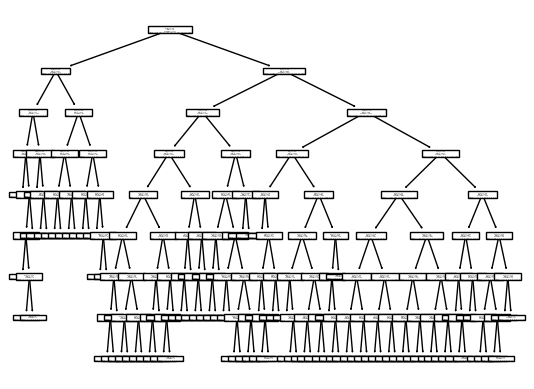

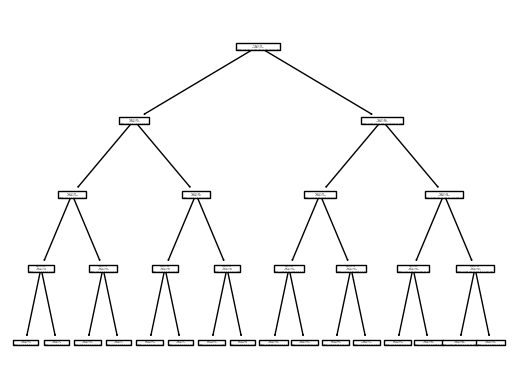

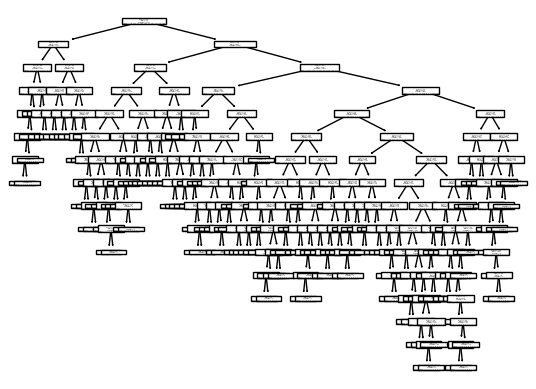

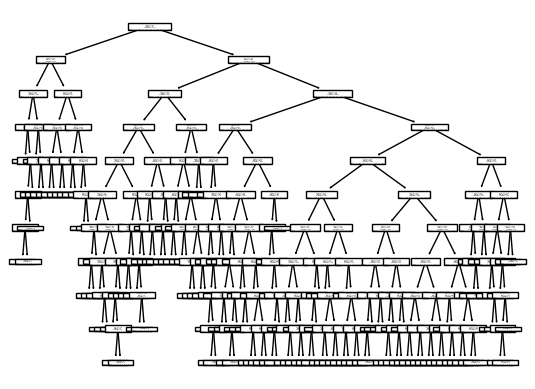

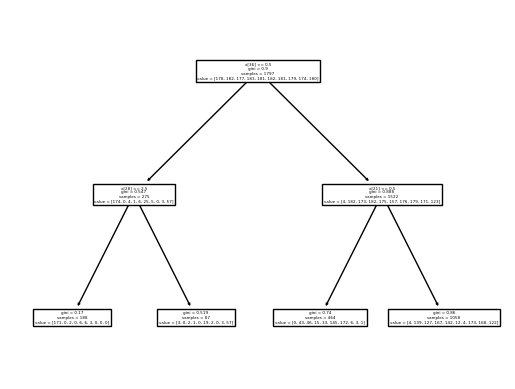

In [59]:
for tree in trees:
    plot_tree(tree)
    plt.show()

In [65]:
results = {}
for i, tree in enumerate(trees):
    results[f"tree_{i}"] = tree.predict(attributes)

In [67]:
results =  pd.DataFrame(results)

In [68]:
results["target"] = targets

In [69]:
results

,tree_0,tree_1,tree_2,tree_3,tree_4,target
0,0,0,0,0,0,0
1,1,3,1,1,7,1
2,8,3,2,2,7,2
3,3,1,3,3,6,3
4,4,0,4,4,0,4
...,...,...,...,...,...,...
1792,9,3,9,9,7,9
1793,0,0,0,0,0,0
1794,8,3,8,8,7,8
1795,9,3,9,9,7,9


In [79]:
forest = RandomForestClassifier(n_estimators = 7)

In [80]:
forest.fit(attributes, targets)

RandomForestClassifier(n_estimators=7)

In [81]:
forest.estimator_

DecisionTreeClassifier()

In [82]:
for estimatior in forest.estimators_:
    print(estimatior.tree_.max_depth)

16
15
14
14
15
12
15


In [84]:
forest.feature_importances_

array([0.        , 0.00497177, 0.02568503, 0.00998014, 0.01143474,
       0.01994729, 0.00659799, 0.00086288, 0.        , 0.01758996,
       0.02214834, 0.00593925, 0.02006053, 0.03181913, 0.00569003,
       0.00059146, 0.        , 0.00327724, 0.02009663, 0.02301061,
       0.02953616, 0.04854334, 0.01231421, 0.        , 0.        ,
       0.01914495, 0.04264181, 0.02408344, 0.05735772, 0.02187243,
       0.0259984 , 0.        , 0.        , 0.01410951, 0.02537839,
       0.01566347, 0.04684646, 0.01820789, 0.03088644, 0.        ,
       0.00034329, 0.01547261, 0.03133539, 0.02663332, 0.01281737,
       0.02408875, 0.01642053, 0.00021213, 0.00013572, 0.00223651,
       0.01126598, 0.01893842, 0.01626418, 0.02812338, 0.01510942,
       0.00134135, 0.        , 0.00112931, 0.02671242, 0.0127679 ,
       0.00756652, 0.04835591, 0.01995051, 0.00049139])

In [85]:
data["feature_names"]

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [92]:
list(zip(data["feature_names"], np.round(forest.feature_importances_, 3)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.005),
 ('pixel_0_2', 0.026),
 ('pixel_0_3', 0.01),
 ('pixel_0_4', 0.011),
 ('pixel_0_5', 0.02),
 ('pixel_0_6', 0.007),
 ('pixel_0_7', 0.001),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.018),
 ('pixel_1_2', 0.022),
 ('pixel_1_3', 0.006),
 ('pixel_1_4', 0.02),
 ('pixel_1_5', 0.032),
 ('pixel_1_6', 0.006),
 ('pixel_1_7', 0.001),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.003),
 ('pixel_2_2', 0.02),
 ('pixel_2_3', 0.023),
 ('pixel_2_4', 0.03),
 ('pixel_2_5', 0.049),
 ('pixel_2_6', 0.012),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.019),
 ('pixel_3_2', 0.043),
 ('pixel_3_3', 0.024),
 ('pixel_3_4', 0.057),
 ('pixel_3_5', 0.022),
 ('pixel_3_6', 0.026),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.014),
 ('pixel_4_2', 0.025),
 ('pixel_4_3', 0.016),
 ('pixel_4_4', 0.047),
 ('pixel_4_5', 0.018),
 ('pixel_4_6', 0.031),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.015),
 ('pixel_5_2', 0.031),
 ('pixel_5_3', 0.027),
 ('pixel_5_

In [87]:
forest.feature_importances_.sum()

1.0

In [94]:
permutation_importance(forest, attributes, targets)["importances_mean"]

array([0.        , 0.00055648, 0.00411797, 0.00155815, 0.00244853,
       0.00489705, 0.00077908, 0.        , 0.        , 0.00111297,
       0.0031163 , 0.00055648, 0.00511964, 0.01291041, 0.00133556,
       0.        , 0.        , 0.        , 0.00356149, 0.00678909,
       0.00578742, 0.02114636, 0.00222593, 0.        , 0.        ,
       0.00378408, 0.01335559, 0.00345019, 0.02548692, 0.00523094,
       0.00244853, 0.        , 0.        , 0.00033389, 0.00478575,
       0.00300501, 0.00567613, 0.00345019, 0.00623261, 0.        ,
       0.        , 0.00278242, 0.01057318, 0.00200334, 0.00166945,
       0.0065665 , 0.00345019, 0.        , 0.        , 0.00055648,
       0.00189204, 0.00445186, 0.00411797, 0.02604341, 0.00189204,
       0.        , 0.        , 0.        , 0.00589872, 0.00211464,
       0.00100167, 0.01758486, 0.00144686, 0.        ])

In [95]:
list(zip(data["feature_names"], np.round(permutation_importance(forest, attributes, targets)["importances_mean"], 3)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0),
 ('pixel_0_2', 0.003),
 ('pixel_0_3', 0.002),
 ('pixel_0_4', 0.002),
 ('pixel_0_5', 0.006),
 ('pixel_0_6', 0.001),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.001),
 ('pixel_1_2', 0.002),
 ('pixel_1_3', 0.0),
 ('pixel_1_4', 0.005),
 ('pixel_1_5', 0.012),
 ('pixel_1_6', 0.001),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.0),
 ('pixel_2_2', 0.004),
 ('pixel_2_3', 0.006),
 ('pixel_2_4', 0.006),
 ('pixel_2_5', 0.018),
 ('pixel_2_6', 0.002),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.005),
 ('pixel_3_2', 0.015),
 ('pixel_3_3', 0.003),
 ('pixel_3_4', 0.026),
 ('pixel_3_5', 0.004),
 ('pixel_3_6', 0.002),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.001),
 ('pixel_4_2', 0.005),
 ('pixel_4_3', 0.003),
 ('pixel_4_4', 0.005),
 ('pixel_4_5', 0.003),
 ('pixel_4_6', 0.006),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.003),
 ('pixel_5_2', 0.009),
 ('pixel_5_3', 0.001),
 ('pixel_5_4', 0